In [1]:
# Code written by: Garret Grimes
# For UMGC DATA 620 Summer 2022
# Professor: Dr. Carrie Beam

## Importing all required libraries

In [2]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib

import pandas as pd
import string
import nltk 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\garre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Here we load in the file based on the filename. If the filename doesn't exist, the program exits.

In [3]:
filename = 'Obama_2016.txt'

try:
    file = open(filename)
except:
    print('File cannot be opened: ', filename)

In [4]:
filename1 = 'Johnson_1968.txt'

try:
    file1 = open(filename1)
except:
    print('File cannot be opened: ', filename1)

In [5]:
filename2 = 'Wilson_1913.txt'

try:
    file2 = open(filename2)
except:
    print('File cannot be opened: ', filename2)

In [6]:
filename3 = 'Grant_1873.txt'

try:
    file3 = open(filename3)
except:
    print('File cannot be opened: ', filename3)

## Here we load in the stopwords from the downloaded nltk stopwords list.

In [7]:
lmtzr = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("•")
stop.append("us")
stop.append("you")
stop.append("thats")

## Function to sort and reverse word list

In [8]:
def sort_and_reverse(lst):
    lst.sort()
    lst.reverse()

## This function graphs the words we choose onto a bar graph and adjusts the labels.

In [9]:
def graph_words(wordlist, N):
    words=[]
    counts=[]
    for x, word in wordlist[:N]:
        words.append(word)
        counts.append(x)
    fig, ax = plt.subplots()
    ax.bar(words, counts)
    fig.autofmt_xdate()
    plt.show()

## Takes in the file, stopwords list, and number of important words and returns the most frequent words

In [10]:
def most_frequent_words(file, stop, N):  
    counts = dict()

    for line in file:
        line = line.rstrip()
        line = line.translate(line.maketrans('', '', string.punctuation))
        line = line.lower()
        words = line.split()

        #Now processes the words list, and removes the stop words.
        for word in words:
            if word not in stop:
                #Lemmatizing- we group similar word inflections together (e.g. rock and rocks becomes the same word)
                word=lmtzr.lemmatize(word)
                if word not in counts:
                    counts[word] = 1
                else:
                    counts[word] += 1
            

    #Puts the dictionary of counts into a list.
    word_list = [(counts[w], w) for w in counts]
    
    #Sort and reverse the list.
    sort_and_reverse(word_list)
    
    #Prints the table of most frequent words
    print("The " + str(N) + " most frequent words are")
    print("Rank\tCount\tWord")
    i = 1
    for x, word in word_list[:N]:
        print('%2s\t%4s\t%s' %(i, x, word))
        i += 1
    
    #Plot the words.
    graph_words(word_list, N)
    
    return counts

## The next 4 lines  are assigning the counts to a variable and the function is returning the top 10 words and graphing the results 


The 10 most frequent words are
Rank	Count	Word
 1	  37	american
 2	  35	year
 3	  33	america
 4	  27	people
 5	  24	work
 6	  24	make
 7	  23	world
 8	  23	change
 9	  20	want
10	  20	need


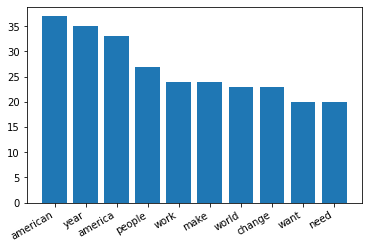

In [11]:
obama = most_frequent_words(file, stop, 10)

The 10 most frequent words are
Rank	Count	Word
 1	  41	year
 2	  29	congress
 3	  27	billion
 4	  24	american
 5	  21	nation
 6	  20	last
 7	  19	new
 8	  18	must
 9	  17	program
10	  17	america


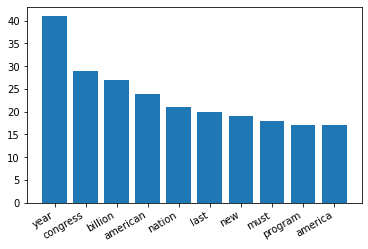

In [12]:
johnson = most_frequent_words(file1, stop, 10)

The 10 most frequent words are
Rank	Count	Word
 1	  20	upon
 2	  18	country
 3	  16	government
 4	  15	people
 5	  13	state
 6	  13	shall
 7	  13	must
 8	  10	may
 9	  10	matter
10	   9	make


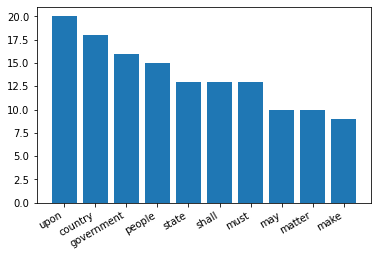

In [13]:
wilson = most_frequent_words(file2, stop, 10)

The 10 most frequent words are
Rank	Count	Word
 1	  66	state
 2	  60	congress
 3	  48	year
 4	  46	united
 5	  45	government
 6	  38	country
 7	  34	would
 8	  29	may
 9	  27	subject
10	  27	last


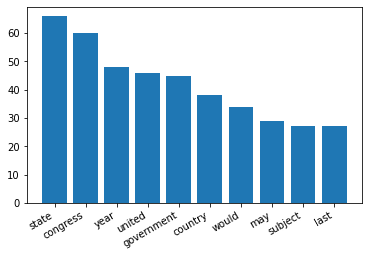

In [14]:
grant = most_frequent_words(file3, stop, 10)

## The next 4 lines are putting the dictionaries in a pandas DF

In [15]:
obama_df = pd.DataFrame(list(obama.items()), columns = ['word', 'count'])

In [16]:
johnson_df = pd.DataFrame(list(johnson.items()), columns = ['word', 'count'])

In [17]:
wilson_df = pd.DataFrame(list(wilson.items()), columns = ['word', 'count'])

In [18]:
grant_df = pd.DataFrame(list(grant.items()), columns = ['word', 'count'])

## Declaring a new column with the year of the address

In [19]:
obama_df['year'] = 2016

In [20]:
johnson_df['year'] = 1968

In [21]:
wilson_df['year'] = 1913

In [22]:
grant_df['year'] = 1873

## Declaring a new column with the president

In [23]:
obama_df['president'] = 'Obama'

In [24]:
johnson_df['president'] = 'Johnson'

In [25]:
wilson_df['president'] = 'Wilson'

In [26]:
grant_df['president'] = 'Grant'

## Appending all of the new DFs so we have one .csv to analyze with Tableau

In [27]:
df = obama_df.append([johnson_df, wilson_df, grant_df])

In [28]:
df.to_csv('all.csv')